In [1]:
#Import packages
from unityagents import UnityEnvironment
from agent import Agent

from collections import deque

import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load Envrionment
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
#Set default brain (actions)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
#Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

#Number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

#Size of actions
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

#Examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('State size: {}'.format(state_size))

Number of agents: 20
Size of each action: 4
State size: 33


In [5]:
#Load Agent
agent = Agent(state_size=33, action_size=4, n_agents=20, random_seed=4)

In [6]:
#Visual Presentation
def plot_scores(scores, episode, rolling_window=10, save_fig=False):
    """Plot scores and optional rolling mean using specified window."""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title("Episode: {}".format(episode))
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    plt.show()

    if save_fig:
        plt.savefig(f'figures_scores.png', bbox_inches='tight', pad_inches=0)

Episode 20	Average Score: 1.58

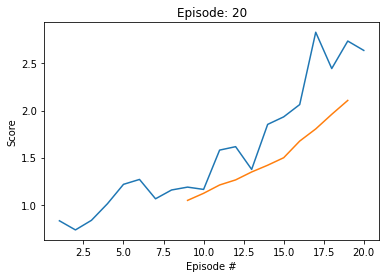

Episode 40	Average Score: 3.85

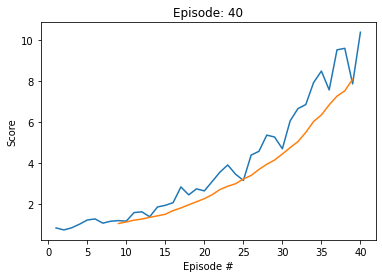

Episode 60	Average Score: 8.23

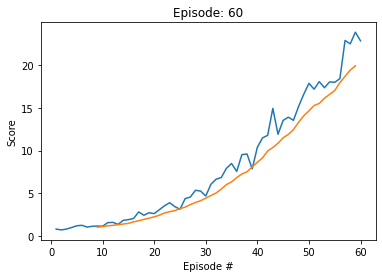

Episode 80	Average Score: 14.85

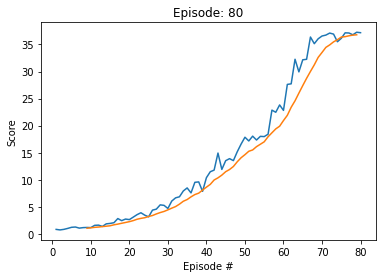

Episode 100	Average Score: 19.29

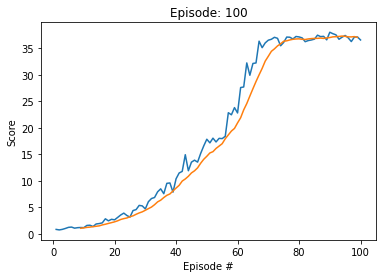

Episode 120	Average Score: 26.06

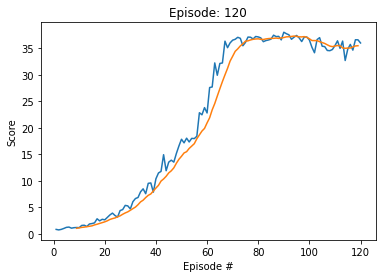

Episode 133	Average Score: 30.24
Environment solved in 133 episodes!	Average Score: 30.24


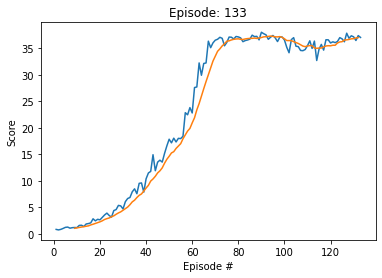

<Figure size 432x288 with 0 Axes>

In [7]:
#Train Agent using DDPG
def ddpg(n_episodes=200, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations  
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            
            env_info = env.step(actions)[brain_name]   
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            agent.step(states, actions, rewards, next_states, dones, t)
            
            states = next_states
            score += rewards
            
            if any(dones):
                break 
                
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % 20 == 0:
            plot_scores(scores, i_episode)
            
        if np.mean(scores_deque) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            plot_scores(scores, i_episode, save_fig=True)
            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

scores = ddpg()

In [8]:
env.close()